## `MotionSense Dataset`

### **Índice do documento**

1. [Introdução](#1.-Introdução)
   
    1.1 [xx](#1.1-Metodologia-adotada)
    
    
2. [Compreensão do Dados](#2.-Compreensão-dos-Dados)

    2.1 [Carregamento das Bibliotecas Base](#2.1-Carregamento-das-Bibliotecas-Base)
    
    2.2 [Carregamento e Análise do *Dataset*](#2.2-Carregamento-e-Análise-do-*Dataset*)

    2.3 [Visualização do *Dataset*](#2.3-Visualização-do-*Dataset*)
   
    2.3.1 [Gráfico de Barras da Quantidade de *Reviews* por Sentimento](#2.3.1-Gráfico-de-Barras-da-Quantidade-de-*Reviews*-por-Sentimento)

    2.3.2 [Histogramas da Frequência do Comprimento das *Reviews* Positivas e Negativas](#2.3.2-Histogramas-da-Frequência-do-Comprimento-das-*Reviews*-Positivas-e-Negativas)

    2.3.3 [Word Cloud das *Reviews*](#2.3.3-Word-Cloud-das-*Reviews*)


# **1. Introdução**

[Voltar ao ínicio](#Índice-do-documento)

# **2. Compreensão dos Dados**

## **2.1 Carregamento das Bibliotecas Base**

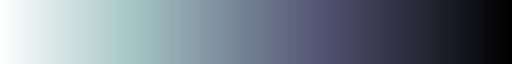

In [4]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.color_palette("bone_r", as_cmap=True)

## **2.2 Carregamento e Análise do Dataset**

+ Definição dos Caminhos

In [22]:
# Caminhos absolutos dos arquivos
subject_data_file = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\APROF\\mei-approf\\RNN\\RNN_dataset\\data_subjects_info.csv'
data_dir = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\RNN_dataset\\A_DeviceMotion_data'

# Verificar se os diretórios e arquivos existem
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"O diretório {data_dir} não foi encontrado.")

if not os.path.exists(subject_data_file):
    raise FileNotFoundError(f"O arquivo {subject_data_file} não foi encontrado.")

+ Mudança de Diretório

In [23]:
os.chdir(data_dir)
os.chdir(os.pardir)

+ Função para Obter Todos os Caminhos dos Arquivos do Conjunto de Dados

`get_all_dataset_paths`: Percorre recursivamente todos os subdiretórios em input_dir e recolhe os caminhos de todos os arquivos CSV encontrados.

In [24]:
def get_all_dataset_paths(input_dir) -> []:
    input_files = []
    for dirs, subdirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.csv'):
                dir_name = os.path.basename(dirs)
                if dir_name.startswith(('dws', 'ups', 'sit')):
                    input_files.append(os.path.join(dirs, file))
    return input_files

+ Função para Carregar os Dados e Combinar com Metadados

`load_whole_dataframe_from_paths`: Carrega cada arquivo CSV listado em paths, adiciona colunas de metadados (subject_id, session_id, category, age, gender, height, weight) e concatena todos os dados em um único DataFrame.

In [27]:
def load_whole_dataframe_from_paths(paths, meta) -> pd.DataFrame:
    
    df = pd.DataFrame()

    for p in paths:
        c_dir, c_file = p.split('\\')[-2], p.split('\\')[-1]
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]
        
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    
    df.reset_index(drop=True, inplace=True)
    return df

+ Carregar os Metadados e Todos os Caminhos dos Arquivos do Conjunto de Dados

`subject_data_frame`: Carrega os metadados dos sujeitos a partir do arquivo CSV.

`all_dataset_paths`: Obtém todos os caminhos dos arquivos CSV no diretório de dados.

`data_frame`: Carrega e combina todos os dados dos arquivos CSV com os metadados.

In [48]:
subject_data_frame = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths = get_all_dataset_paths(data_dir)
df_motionSense = load_whole_dataframe_from_paths(all_dataset_paths, subject_data_frame)

In [49]:
linha_filtrada = df_motionSense.loc[(df_motionSense['session_id'] == 5) & (df_motionSense['category'] == 'sit')]
linha_filtrada

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_id,session_id,category,age,gender,height,weight
235977,0,0.351138,-0.416302,-0.098023,0.314588,0.404381,-0.858784,-0.003655,0.009577,-0.000234,0.000094,0.000252,-0.006954,1,5,sit,46,1,188,102
235978,1,0.351219,-0.416372,-0.098025,0.314649,0.404445,-0.858732,-0.007937,0.007457,0.000807,-0.001309,0.002262,-0.010348,1,5,sit,46,1,188,102
235979,2,0.351145,-0.416497,-0.098045,0.314567,0.404560,-0.858708,-0.007960,-0.001053,-0.002387,-0.002174,0.000012,-0.006664,1,5,sit,46,1,188,102
235980,3,0.350849,-0.416695,-0.098148,0.314286,0.404740,-0.858726,-0.000521,-0.006411,-0.001261,0.001693,0.009216,-0.011575,1,5,sit,46,1,188,102
235981,4,0.350859,-0.416863,-0.098022,0.314271,0.404894,-0.858658,-0.001613,-0.004306,0.006206,0.005767,0.007490,-0.008926,1,5,sit,46,1,188,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470629,11120,0.500275,-0.438649,-0.947679,0.434255,0.424717,-0.794379,-0.016683,0.020522,0.009715,0.003688,0.012585,-0.007730,9,5,sit,32,1,190,93
470630,11121,0.500869,-0.438842,-0.947291,0.434688,0.424891,-0.794049,-0.017750,0.020526,0.009707,0.005315,0.016897,-0.006213,9,5,sit,32,1,190,93
470631,11122,0.501297,-0.439082,-0.947048,0.434978,0.425108,-0.793774,-0.016664,0.014173,-0.000959,-0.001217,0.018770,-0.001240,9,5,sit,32,1,190,93
470632,11123,0.501563,-0.439347,-0.947039,0.435136,0.425348,-0.793559,-0.008110,0.009916,-0.009440,-0.008530,0.017141,0.003352,9,5,sit,32,1,190,93


In [50]:
df_motionSense.head(10)

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_id,session_id,category,age,gender,height,weight
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,1,dws,46,1,188,102
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,1,dws,46,1,188,102
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,1,dws,46,1,188,102
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,1,dws,46,1,188,102
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,1,dws,46,1,188,102
5,5,1.476302,-0.700807,0.669443,0.760912,0.644835,-0.072116,0.187742,-0.763656,0.226057,0.168241,0.145906,0.012455,1,1,dws,46,1,188,102
6,6,1.455153,-0.694408,0.662593,0.763300,0.639930,-0.088666,0.343096,-0.803820,0.278468,0.079382,-0.026344,-0.195590,1,1,dws,46,1,188,102
7,7,1.441702,-0.690710,0.656459,0.764380,0.637084,-0.099229,0.176202,-0.172756,0.056415,0.069360,0.072678,-0.102920,1,1,dws,46,1,188,102
8,8,1.443440,-0.691905,0.651196,0.763796,0.638005,-0.097803,0.274786,0.446585,-0.132766,0.072889,0.079921,-0.075323,1,1,dws,46,1,188,102
9,9,1.443071,-0.693039,0.638198,0.763042,0.638878,-0.097993,0.633672,0.316372,-0.115137,0.098347,-0.017021,-0.197310,1,1,dws,46,1,188,102


## **2.3 Data Preprocessing: Removing Unnecessary Columns**

In this Python code, a copy of the original DataFrame 'data_frame' is created. Subsequently, several columns ('Unnamed: 0', 'subject_id', 'session_id', 'age', 'gender', 'height', and 'weight') are removed from the copied DataFrame 'df' to streamline the dataset for further analysis.

In [51]:
df = df_motionSense.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)
df


df = data_frame.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,category
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,dws
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,dws
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,dws
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,dws
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,dws
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627914,3.128664,-1.459053,2.100524,0.001441,0.993763,0.111447,-0.642311,-1.088007,-0.806664,0.371621,0.340954,-0.003522,ups
627915,-3.065673,-1.449931,2.208186,-0.009141,0.992705,0.120173,-0.270775,-0.725142,-0.497954,0.382203,0.342012,-0.012248,ups
627916,-3.074149,-1.450820,2.215258,-0.008063,0.992811,0.119366,0.229045,-0.855423,0.212867,0.186575,0.741182,-0.168118,ups
627917,3.116036,-1.459104,2.140601,0.002847,0.993769,0.111370,0.414708,-1.047870,0.492148,-0.469110,0.784826,-0.396953,ups


## **2.4 Encoding Categorical Data for Machine Learning**

Following Python code snippet utilizes the 'LabelEncoder' from the scikit-learn library to transform the 'category' column in the DataFrame 'df' into numerical codes. These codes are stored in a new 'code' column, and the original 'category' column is subsequently removed from the DataFrame, preparing the data for machine learning tasks.

In [ ]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
labels = lEncoder.fit(df.category)
df['code'] = lEncoder.transform(df.category)
df.drop('category', axis=1, inplace=True)
df

## **2.5 Visualizing Categorical Data Distribution**

We use Seaborn and Matplotlib to create a countplot, visualizing the distribution of numerical codes in the 'code' column of the DataFrame 'df.' This plot provides insight into the frequency of different categories in the dataset.

In [ ]:
pd.isna(df).sum()

In [ ]:
category_counts = df['category'].value_counts()
category_counts = df['category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Value Counts')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

sns.countplot(df, x='code')
plt.show()

In [ ]:
print('Number of volunteers in the dataset')
subject_id_list = df['subject_id'].unique()
subject_id_list

In [ ]:
print('Number of action record in the dataset')
session_id_list = df['session_id'].unique()
session_id_list